In [17]:
import sys
sys.path.append("../..")

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from genetic_mlp import GeneticMLP
from multilayer_perceptron.mlp.network import MLP
from multilayer_perceptron.mlp.optimisers import MomentumGD, RMSProp
from multilayer_perceptron.mlp.activations import TanhActivation, LinearActivation, SoftmaxActivation, ReLUActivation, SigmoidActivation
from multilayer_perceptron.mlp.lossfunc_and_metrics import MSE, CrossEntropy, fmeasure_prob

In [19]:
# Default plotting settings for matplotlib
plt.rc('figure', figsize=(8, 6), dpi=100)

# `iris`

In [15]:
iris = pd.read_csv('data/iris.data', header=None)
iris_x = iris[[0, 1, 2, 3]].to_numpy().reshape((-1, 4))
iris_y = pd.get_dummies(iris[4]).to_numpy().reshape((-1, 3))

In [16]:
genmlp_iris = GeneticMLP(
    input_size=4, hidden_layers_sizes=[5], output_size=3,
    activation_func=SigmoidActivation(), out_func=SoftmaxActivation(),
    loss=CrossEntropy(),
    population_size=30, random_state=26,
)

In [17]:
genmlp_iris.train(
    epochs=500, x_train=iris_x, y_train=iris_y,
    verbosity_period=50,
)

Epoch 50 done! loss = 89.91
Epoch 100 done! loss = 63.60
Epoch 150 done! loss = 41.42
Epoch 200 done! loss = 22.07
Epoch 250 done! loss = 18.42
Epoch 300 done! loss = 23.72
Epoch 350 done! loss = 15.13
Epoch 400 done! loss = 16.08
Epoch 450 done! loss = 16.29
Epoch 500 done! loss = 10.38


In [18]:
fmeasure_prob(iris_y, genmlp_iris.predict(iris_x, iris_y))

0.9866666666666668

# `multimodal_large`

In [11]:
multi = pd.read_csv('../../multilayer_perceptron/data/regression/multimodal-large-test.csv')
multi_x = multi['x'].to_numpy().reshape((-1, 1))
multi_y = multi['y'].to_numpy().reshape((-1, 1))

In [12]:
genmlp_multi = GeneticMLP(
    input_size=1, hidden_layers_sizes=[15, 15], output_size=1,
    activation_func=SigmoidActivation(), out_func=LinearActivation(),
    loss=MSE(),
    population_size=30, random_state=26,
)

In [13]:
genmlp_multi.train(
    epochs=1000, x_train=multi_x, y_train=multi_y,
    verbosity_period=5,
)

Epoch 5 done! loss = 6253.77
Epoch 10 done! loss = 10105.87
Epoch 15 done! loss = 9514.00
Epoch 20 done! loss = 9514.00
Epoch 25 done! loss = 6439.63
Epoch 30 done! loss = 9005.02
Epoch 35 done! loss = 8247.66
Epoch 40 done! loss = 6064.35
Epoch 45 done! loss = 5834.59
Epoch 50 done! loss = 4799.90
Epoch 55 done! loss = 5834.59
Epoch 60 done! loss = 8267.83
Epoch 65 done! loss = 6295.84
Epoch 70 done! loss = 15429.21
Epoch 75 done! loss = 12810.94
Epoch 80 done! loss = 10584.21
Epoch 85 done! loss = 10425.28
Epoch 90 done! loss = 9135.47
Epoch 95 done! loss = 9135.47
Epoch 100 done! loss = 9135.47
Epoch 105 done! loss = 10453.38
Epoch 110 done! loss = 6642.62
Epoch 115 done! loss = 4555.92
Epoch 120 done! loss = 8207.88
Epoch 125 done! loss = 14276.25
Epoch 130 done! loss = 10179.11
Epoch 135 done! loss = 10179.11
Epoch 140 done! loss = 7839.35
Epoch 145 done! loss = 10179.11
Epoch 150 done! loss = 5589.05
Epoch 155 done! loss = 13664.39
Epoch 160 done! loss = 13664.39
Epoch 165 done! 

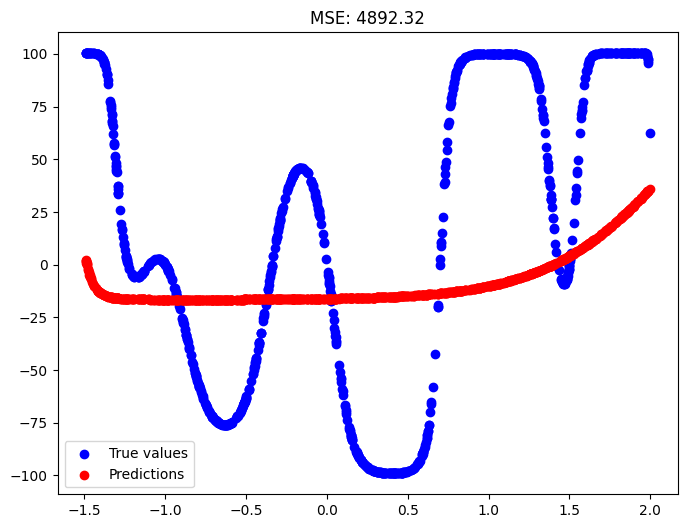

In [20]:
plt.scatter(multi_x, multi_y, color='blue', label='True values')
plt.scatter(multi_x, genmlp_multi.predict(multi_x, multi_y), color='red', label='Predictions')
plt.title(f'MSE: 4892.32')
plt.legend()
plt.show()

# `auto_mpg`

In [4]:
auto = pd.read_csv('data/auto-mpg.data', header=None, delim_whitespace=True)
auto_x = auto[[1, 2, 4, 5, 6, 7]].to_numpy().reshape((-1, 6))
auto_y = auto[0].to_numpy().reshape((-1, 1))

In [7]:
pd.DataFrame({'y': auto_y.flatten()}).describe()

,y
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


In [49]:
genmlp_auto = GeneticMLP(
    input_size=6, hidden_layers_sizes=[10, 10], output_size=1,
    activation_func=SigmoidActivation(), out_func=LinearActivation(),
    loss=MSE(),
    population_size=100, random_state=26,
)

In [50]:
genmlp_auto.train(
    epochs=600, x_train=auto_x, y_train=auto_y,
    verbosity_period=20,
)

Epoch 20 done! loss = 18.74
Epoch 40 done! loss = 18.74
Epoch 60 done! loss = 18.74
Epoch 80 done! loss = 17.73
Epoch 100 done! loss = 17.73
Epoch 120 done! loss = 17.73
Epoch 140 done! loss = 17.73
Epoch 160 done! loss = 17.73
Epoch 180 done! loss = 17.73
Epoch 200 done! loss = 17.73
Epoch 220 done! loss = 17.73
Epoch 240 done! loss = 17.73
Epoch 260 done! loss = 17.73
Epoch 280 done! loss = 17.73
Epoch 300 done! loss = 17.73
Epoch 320 done! loss = 17.73
Epoch 340 done! loss = 17.73
Epoch 360 done! loss = 17.73
Epoch 380 done! loss = 17.73
Epoch 400 done! loss = 17.73
Epoch 420 done! loss = 17.42
Epoch 440 done! loss = 17.73
Epoch 460 done! loss = 17.73
Epoch 480 done! loss = 17.73
Epoch 500 done! loss = 17.73
Epoch 520 done! loss = 17.73
Epoch 540 done! loss = 17.73
Epoch 560 done! loss = 17.73
Epoch 580 done! loss = 17.73
Epoch 600 done! loss = 17.73


In [9]:
np.sqrt(17.73)

4.21070065428546